# initilise the search space


In [6]:

import os
os.chdir('c:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH\\')
#os.chdir('/rds/general/user/ma11115/home/STK_Search/STK_search')

from stk_search import Searched_space
import importlib
importlib.reload(Searched_space)
import pickle
import pymongo
import pandas as pd
import numpy as np
from stk_search.utils import database_utils


In [28]:
# load the data and the precursors dataset
importlib.reload(database_utils)
df_total_path = "data/output/Full_dataset/New_target200324.csv"
df_precursors_path ="data/output/Prescursor_data/precursor_data_200324.pkl"
df_total_new , df_precursors= database_utils.load_data_from_file(df_total_path, df_precursors_path)

C:\Users\ma11115\OneDrive - Imperial College London\github_folder\STK_search\src\stk_search\utils\database_utils.py:109: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  how="left",


In [35]:
df_to_plot

,InChIKey,Atom_num,HOMO (eV),LUMO (eV),HOMO_LUMO_GAP (eV),IP (eV),EA (eV),total energy (eV) vipea,First excited state Energy (eV),First excited osc,...,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,check
22,UBDUZEIOGICXGR-UHFFFAOYSA-N,23,-11.0580,-9.2262,1.831859,7.2473,3.4087,-1424.338027,"[3.974, 4.064, 4.543, 5.465, 5.667]","[0.1439, 0.0525, 0.0581, 0.0106, 0.8344]",...,-10.270099,6.576304,5.054221,0.812202,4.189384,-0.401446,18.351993,-3.717433,-1.572372,1
300,OXQHVZWZYSWYCZ-KTAJNNJTSA-N,19,-11.6164,-9.6875,1.928885,7.4860,4.0829,-1364.603610,"[3.292, 3.672, 3.85, 4.089, 4.397]","[0.0817, 0.1023, 0.0004, 0.6826, 0.1086]",...,11.493959,-13.390189,1.717817,1.448827,-5.754039,-7.415130,-1.148427,2.936538,0.453192,1
131,MUGDXWZSYKDJGU-ACAGNQJTSA-N,28,-11.3158,-9.6406,1.675210,7.1002,4.0569,-1687.388442,"[3.455, 3.613, 3.729, 4.155, 4.357]","[0.1214, 0.0112, 0.0007, 0.3795, 0.5743]",...,6.309685,-7.964381,2.858713,2.557867,-1.139956,8.581606,-3.999364,4.754177,3.316671,1
53,CEOYQOFPBNOBGE-OQFOIZHKSA-N,22,-11.6456,-9.8128,1.832803,7.5728,4.1402,-1426.085681,"[3.722, 3.835, 3.947, 4.103, 4.483]","[0.0001, 0.0069, 0.1923, 0.4318, 0.0177]",...,-8.817310,9.506401,-0.698424,1.335261,-7.361102,2.304261,-3.028533,2.165446,1.357211,1


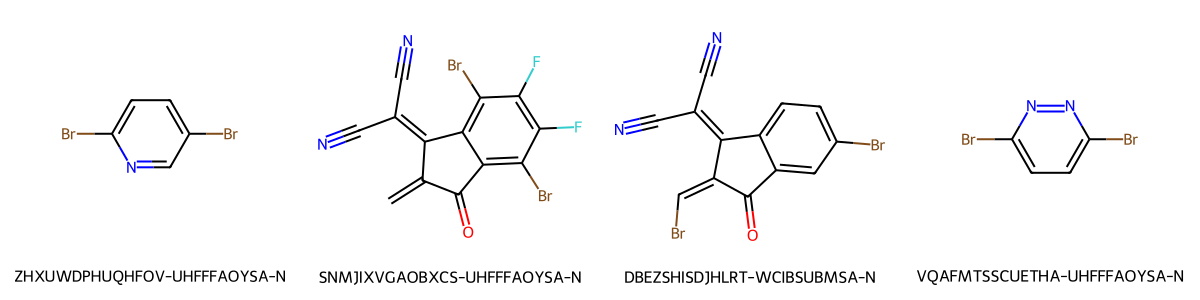

In [38]:
# plot some example of precursors
from rdkit.Chem import Draw
from rdkit import Chem
mol_list = []
mol_label = []
df_to_plot = df_precursors.sample(4)
df_to_plot['mol_opt_smiles'] = df_to_plot['mol_opt_2'].apply(lambda x : Chem.MolFromSmiles(Chem.MolToSmiles(x)))
mol_list.extend(df_to_plot['mol_opt_smiles'].values)
mol_label.extend(df_to_plot['InChIKey'].values)
# Draw molecules
img = Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(300, 300),legends=[f"{label}" for label in mol_label])  # adjust molsPerRow and subImgSize as needed
img

In [39]:
#%%  generate the search space
number_of_fragments = 6
target_name = 'target' # specify the target name ( here target refers to the combined property)
aim = 0.0 # specify the target value

SP = Searched_space.Searched_Space(number_of_fragments=number_of_fragments,df=df_precursors,features_frag=df_precursors.columns[0:1],generation_type='conditional')
print(SP.features_frag)
SP.generate_interactive_condition_V2(df_total=df_total_new)

Index(['InChIKey'], dtype='object')


In [40]:
import glob
#%% 

search_spaces_dfs = glob.glob('data/*pkl')
for id,df_path_SP in enumerate(search_spaces_dfs):
    print(id,df_path_SP)


0 data\search_space_properties_2023_09_11_12_03_15.pkl
1 data\search_space_properties_2023_09_21_16_41_29.pkl
2 data\search_space_properties_2023_09_22_09_04_06.pkl
3 data\search_space_properties_2023_10_30_11_19_54.pkl
4 data\search_space_properties_2023_10_30_15_51_43.pkl
5 data\search_space_properties_2023_10_30_15_52_38.pkl
6 data\search_space_properties_2023_10_30_15_54_12.pkl
7 data\search_space_properties_2023_10_30_15_54_29.pkl
8 data\search_space_properties_2023_10_30_16_15_58.pkl
9 data\search_space_properties_2023_10_30_16_20_54.pkl
10 data\search_space_properties_2024_05_07_11_27_14.pkl


In [42]:
df_SP = pd.read_pickle(search_spaces_dfs[10])
df_SP

,number of elements,syntax,conditions,Elements in top 5%,number of elements evaluated
0,820972403643456,"[0, 1, 2, 3, 4, 5]","[[], [], [], [], [], []]",0,0


In [44]:
# load the saved dataframe with all the tested conditions
# and output it in order to select a few to add to the bactk experiment

import pickle
from datetime import datetime
import os

def save_SP_for_EXP(df:pd.DataFrame,index_list:list,exp_name:str,number_of_fragments):
    time_now = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    save_dir = f'data/input/EXP_search_space/{exp_name}_{time_now}/'
    os.makedirs(save_dir,exist_ok=True)
    SP = Searched_space.Searched_Space(number_of_fragments=number_of_fragments,df=df_precursors,features_frag=df_precursors.columns[0:1],generation_type='conditional')
    SP.features_frag=SP.features_frag.append(df_precursors.columns[17:23])
    SP.features_frag=SP.features_frag.append(df_precursors.columns[1:7])

    for id in index_list:
        SP.conditions_list = df['conditions'].values[id]
        SP.syntax = list(df['syntax'].values[id])[:number_of_fragments]
        #SP.redefine_search_space()
        print(SP.space_size)
        print(SP.syntax)
        print(SP.conditions_list)
        pickle.dump(SP,file=open(save_dir+f'/search_space_{id}.pkl','wb'))
    return SP, save_dir
experiment_name = '6_frag_all'
SP,save_dir= save_SP_for_EXP(df_SP,[0],experiment_name,number_of_fragments)

820972403643456
[0, 1, 2, 3, 4, 5]
[[], [], [], [], [], []]
